In [5]:
# -*- coding: utf-8 -*-
# ---------------- #
# Import libraries:
import os
import numpy as np
import torch
# Loading bar
from tqdm.notebook import tqdm

# ---------------- #
# Managers:
## folder manager
from scripts.startUp import StartUp
## Training manager
from scripts.trainingManager import TrainingManager

# ---------------- #
# Algorithms
## KNN algorithm 
from sklearn.neighbors import NearestNeighbors
## MLP
### Model
from model.mlp import MyModel
### Loss function
from model.loss_functions import LossFunctions

### Data generation
from scripts.generation import Generator
### Training
from training_loop import train_model_loss_static_val #,train_model, train_model_loss

### Metrics
from scripts.metrics import Metrics

# ---------------- #
# Visualisation:
## Plot
import matplotlib.pyplot as plt
## Movie generator
import imageio.v2 as imageio
## Plot functions
from scripts.plotter import Plotter

# Paths and directory maintenance

In [6]:
#models = ['pos', 'head']

models = [#'pos_diagonal_sum_loss','pos_diagonal_softmax_loss','pos_cross_entropy_matching_loss','pos_softmax_diagonal_loss','pos_softmax_matching_loss','pos_contrastive_distance_loss', 'pos_triplet_margin_loss',
          'head_diagonal_sum_loss','head_diagonal_softmax_loss','head_cross_entropy_matching_loss','head_softmax_diagonal_loss','head_softmax_matching_loss','head_contrastive_distance_loss', 'head_triplet_margin_loss']

# Set up the file paths
curpath = r'C:\Users\abelt\OneDrive\Dokumenter\GitHub\Ship_datafusion\playground'
os.makedirs(curpath, exist_ok=True)

paths = StartUp.clear_folder(currpath= curpath, models=models, clear_movies=False)
formatted_time = StartUp.get_time()

# Dataset generation
Move: Initial parameters

Missing mask - data points:
- TODO: p1 should have more data points than p2, use a mask to simulate less datapoints in p2
- p2_masked, ground_truth_masked = Generator.mask_data_points(p1, p2, missing_percentage_data)

Missing mask - values:
- TODO: There should be missing values in the data points, use a mask to simulate missing values

In [7]:
# Set up model and optimizer
np.random.seed(1)

maxiter = 500
N = 2000
N_test = N//10
sigma_distance = 0.05
sigma_heading = 0.005
missing_percentage_data = 0.5
missing_percentage_values = 0.8

ranks = [1, 3, 5]

# Generate validation data
# Position data:
p1, p2 = Generator.generate_data(N_test, sigma=sigma_distance)
# Ground truth:
ground_truth = np.arange(p1.shape[0])
# Heading data:
t1, t2 = Generator.calculate_heading(p1,p2, sigma=sigma_heading)
# Speed over ground data:


# Missing mask - data points:
# TODO p1 should have more data points than p2, use a mask to simulate less datapoints in p2
## Mask data points
p2_masked, ground_truth_masked = Generator.mask_data_points(p1, p2, missing_percentage_data)

# Missing mask - values:
# TODO There should be missing values in the data points, use a mask to simulate missing values

# KNN

In [8]:
## Functions
# --------------------------- Matching Functions ---------------------------- #
def knn_matching(p1, p2, k=1):
    """
    Apply KNN to match p1 and p2 using haversine distance.
    """
    n1, n2 = p1.shape[1], p2.shape[1]
    distances = np.zeros((n1, n2))
    for i in range(n1):
        for j in range(n2):
            distances[i, j] = haversine_distance(p1[0, i], p1[1, i], p2[0, j], p2[1, j])
    knn = NearestNeighbors(n_neighbors=k, metric='precomputed')
    knn.fit(distances)
    distances, indices = knn.kneighbors(distances, return_distance=True)
    return indices, distances

# ---------------------------- Utility Functions ---------------------------- #
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees).
    """
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return c * r

# --------------------------- Plotting Functions ---------------------------- #
def plot_knn_matching(p1, p2, ground_truth, indices):
    """
    Plot track matching visualization with KNN matching results.
    
    Args:
    - p1: numpy array, data points in p1.
    - p2: numpy array, data points in p2.
    - ground_truth: numpy array, ground truth indices.
    - indices: numpy array, predicted indices from KNN.
    """
    points1 = p1.T
    points2 = p2.T  
    # Create subplot grid
    fig, axes = plt.subplots(1, 1, figsize=(15, 6), dpi = 100, constrained_layout=True)
    # Plot track matching visualization in [0, 0]
    Plotter.plot_tracks(axes, points1, points2, title="Track Matching Visualization, KNN Matching")
    # Plot a single dummy line for Ground Truth and KNN Match to include in the legend
    axes.plot([], [], color='g', linestyle='-', label="Ground Truth")
    axes.plot([], [], color='r', linestyle='--', label="KNN Match")

    Plotter.plot_connection(axes, p1, p2, ground_truth, color='g', linestyle='-', label="Ground Match")
    Plotter.plot_connection(axes, p1, p2, indices[:, 0], color='r', linestyle='--', label="KNN Match")

    axes.legend(['Sensor 1','Sensor 2', 'Ground Truth', 'KNN match'], loc='upper left', bbox_to_anchor=(1.009, 1), fancybox=True, shadow=True)

    plt.show()
    return fig, axes

Rank percentages: {1: 25.5, 3: 59.0, 5: 80.0}


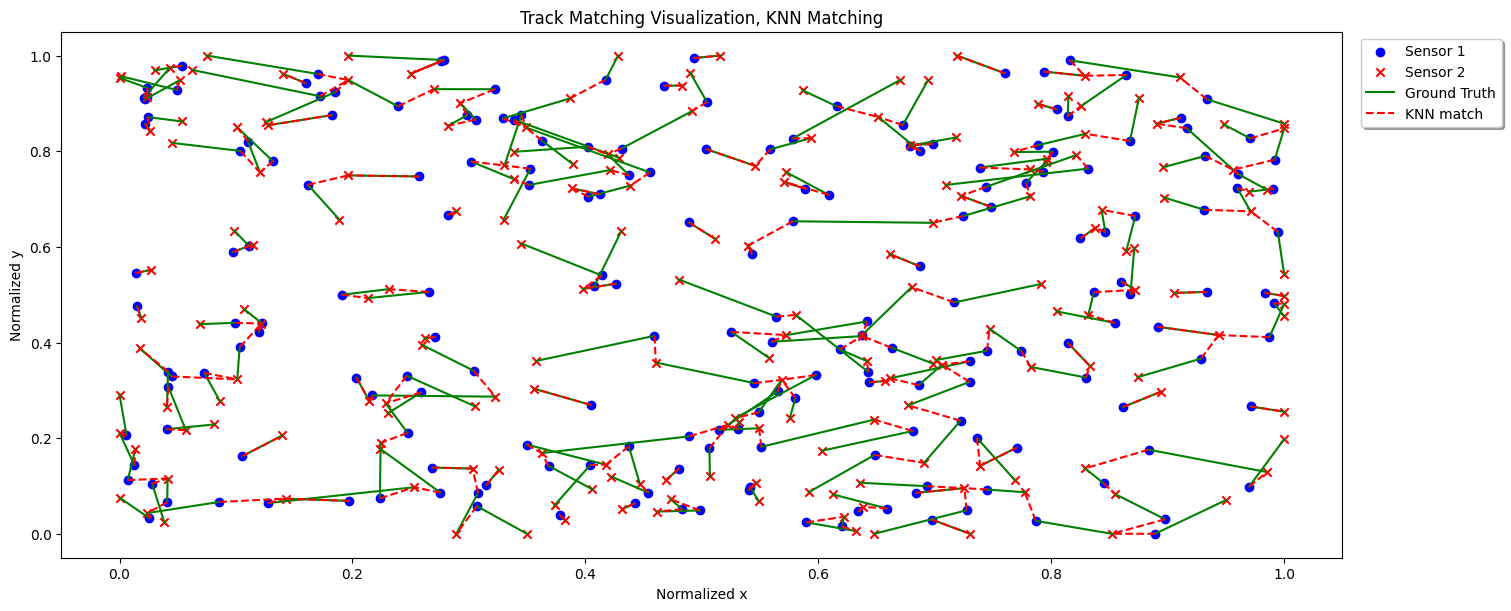

In [9]:
# --------------------------- K-Nearest Neighbour - Main Workflow ---------------------------- #
indices, distances = knn_matching(p1.T, p2.T, k=10)

percentages = {}
for rank in ranks:
    within_rank = np.any(indices[:, :rank] == ground_truth[:, None], axis=1)
    percentage = np.mean(within_rank) * 100  # Convert to percentage
    percentages.update({rank : float(percentage)})
print('Rank percentages:', percentages)

_, _ = plot_knn_matching(p1, p2, ground_truth, indices)


# Machine
Make a train_model function that takes the p1 and p2 for validation and visualization. So videos contain the same points

## POS:

In [10]:
# # Train a model with positional data
# model_pos, manager_pos = train_model(
#     model_type='pos',
#     input_dim=2,
#     max_iter=maxiter,
#     N = N,
# )

In [13]:
# Train a model with heading data

## diagonal_sum_loss
model_pos, manager_pos = train_model_loss_static_val(model_type='pos_diagonal_sum_loss',
    input_dim=2,
    p1 = p1, p2 = p2,
    max_iter=maxiter,
    N = N,
    sigma_distance=sigma_distance,
    sigma_heading = sigma_heading,
    loss_function=LossFunctions.diagonal_sum_loss,
)

# ## diagonal_softmax_loss
# model_pos, manager_pos = train_model_loss_static_val(
#     model_type='pos_diagonal_softmax_loss',
#     input_dim=2,
#     p1 = p1, p2 = p2,
#     max_iter=maxiter,
#     N = N,
#     sigma_distance=sigma_distance,
#     sigma_heading = sigma_heading,
#     loss_function=LossFunctions.diagonal_softmax_loss,
# )

# ## cross_entropy_matching_loss
# model_pos, manager_pos = train_model_loss_static_val(
#     model_type='pos_cross_entropy_matching_loss',
#     input_dim=2,
#     p1 = p1, p2 = p2,
#     max_iter=maxiter,
#     N = N,
#     sigma_distance=sigma_distance,
#     sigma_heading = sigma_heading,
#     loss_function=LossFunctions.cross_entropy_matching_loss,
# )

# ## softmax_diagonal_loss
# model_pos, manager_pos = train_model_loss_static_val(
#     model_type='pos_softmax_diagonal_loss',
#     input_dim=2,
#     p1 = p1, p2 = p2,
#     max_iter=maxiter,
#     N = N,
#     sigma_distance=sigma_distance,
#     sigma_heading = sigma_heading,
#     loss_function=LossFunctions.softmax_diagonal_loss,
# )

# ## softmax_matching_loss
# model_pos, manager_pos  = train_model_loss_static_val(
#     model_type='pos_softmax_matching_loss',
#     input_dim=2,
#     p1 = p1, p2 = p2,
#     max_iter=maxiter,
#     N = N,
#     sigma_distance=sigma_distance,
#     sigma_heading = sigma_heading,
#     loss_function=LossFunctions.softmax_matching_loss,
# )

# ## contrastive_loss
# model_pos, manager_pos  = train_model_loss_static_val(
#     model_type='pos_contrastive_distance_loss',
#     input_dim=2,
#     p1 = p1, p2 = p2,
#     max_iter=maxiter,
#     N = N,
#     sigma_distance=sigma_distance,
#     sigma_heading = sigma_heading,
#     loss_function=LossFunctions.contrastive_distance_loss,
# )

# ## triplet_margin_loss
# model_pos, manager_pos  = train_model_loss_static_val(
#     model_type='pos_triplet_margin_loss',
#     input_dim=2,
#     p1 = p1, p2 = p2,
#     max_iter=maxiter,
#     N = N,
#     sigma_distance=sigma_distance,
#     sigma_heading = sigma_heading,
#     loss_function=LossFunctions.triplet_margin_loss,
# )


diagonal_sum_loss


Training pos_diagonal_sum_loss-model:   0%|          | 0/501 [00:00<?, ?it/s]

Training video for pos_diagonal_sum_loss, saved at .\results\pos_diagonal_sum_loss\movies\20241203T124737_training_pos_diagonal_sum_loss.mp4


## Heading:

In [ ]:
# Train a model with heading data

## diagonal_sum_loss
model_head, manager_head = train_model_loss_static_val(
    model_type='head_diagonal_sum_loss',
    input_dim=3,
    p1 = t1, p2 = t2,
    max_iter=maxiter,
    N = N,
    sigma_distance=sigma_distance,
    sigma_heading = sigma_heading,
    loss_function=LossFunctions.diagonal_sum_loss,
)

## diagonal_softmax_loss
model_head, manager_head = train_model_loss_static_val(
    model_type='head_diagonal_softmax_loss',
    input_dim=3,
    p1 = t1, p2 = t2,
    max_iter=maxiter,
    N = N,
    sigma_distance=sigma_distance,
    sigma_heading = sigma_heading,
    loss_function=LossFunctions.diagonal_softmax_loss,
)

## cross_entropy_matching_loss
model_head, manager_head = train_model_loss_static_val(
    model_type='head_cross_entropy_matching_loss',
    input_dim=3,
    p1 = t1, p2 = t2,
    max_iter=maxiter,
    N = N,
    sigma_distance=sigma_distance,
    sigma_heading = sigma_heading,
    loss_function=LossFunctions.cross_entropy_matching_loss,
)

## softmax_diagonal_loss
model_head, manager_head = train_model_loss_static_val(
    model_type='head_softmax_diagonal_loss',
    input_dim=3,
    p1 = t1, p2 = t2,
    max_iter=maxiter,
    N = N,
    sigma_distance=sigma_distance,
    sigma_heading = sigma_heading,
    loss_function=LossFunctions.softmax_diagonal_loss,
)

## softmax_matching_loss
model_head, manager_head = train_model_loss_static_val(
    model_type='head_softmax_matching_loss',
    input_dim=3,
    p1 = t1, p2 = t2,
    max_iter=maxiter,
    N = N,
    sigma_distance=sigma_distance,
    sigma_heading = sigma_heading,
    loss_function=LossFunctions.softmax_matching_loss,
)

## contrastive_loss
model_head, manager_head = train_model_loss_static_val(
    model_type='head_contrastive_distance_loss',
    input_dim=3,
    p1 = t1, p2 = t2,
    max_iter=maxiter,
    N = N,
    sigma_distance=sigma_distance,
    sigma_heading = sigma_heading,
    loss_function=LossFunctions.contrastive_distance_loss,
)

## triplet_margin_loss
model_head, manager_head = train_model_loss_static_val(
    model_type='head_triplet_margin_loss',
    input_dim=3,
    p1 = t1, p2 = t2,
    max_iter=maxiter,
    N = N,
    sigma_distance=sigma_distance,
    sigma_heading = sigma_heading,
    loss_function=LossFunctions.triplet_margin_loss,
)

## Speed over ground:

In [ ]:
# Train a model with sog and heading data
t1.shape

# Masking

### ToDo
Create individual python classes for:
1. KNN algorithm that matches the data only using position (lat, lon) with haversine and euclidean. DONE
<br> 1.2. Hungarian algorithm.

2. MLP with only position (lat, lon). It should show that it tends to the same solution as the KNN. DONE

3. MLP with
<br> 3.1 Headin. DONE
<br> 3.2 COG

4. MLP with SOG
    - Siden at det er instantanious så ville værdien ikke beskrive noget nyt om skibets position for matching.

5. Missing data masking of data to simulate real time data. Where AIS is not always existing
    - Try to input AIS (with all information) and SAR with only position (lat, lon). See how the model performs.

How:
1) Make model not generate plots during testing but only after.
    - Or make it a boolean statement. True = plot during, False = Plot after.
2) Set up this .ipynb with a cell for each model. The MLP's should have same parameters such that comparisons can be made.
3) Create a cell, that generates the same test set for all models.

1) Masks for:
AIS to SAR data ratio e.g. Only X% of True matches: $M_{p2} = N_{p1} \cdot X_{\%} $
        - 
    - Missing parameters, e.g. heading, speed, cog are NaN and sar simply not contanining them.

# MORE METICS
- Confuion matrix
- Accuracy
- Recall
- Precision
- mAP